In [1]:
import openml
from benchmark_utils import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
benchmark_suite = openml.study.get_study('OpenML-CC18','tasks') # obtain the benchmark suite
print(benchmark_suite.tasks)

[3, 6, 11, 12, 14, 15, 16, 18, 22, 23, 28, 29, 31, 32, 37, 43, 45, 49, 53, 219, 2074, 2079, 3021, 3022, 3481, 3549, 3560, 3573, 3902, 3903, 3904, 3913, 3917, 3918, 7592, 9910, 9946, 9952, 9957, 9960, 9964, 9971, 9976, 9977, 9978, 9981, 9985, 10093, 10101, 14952, 14954, 14965, 14969, 14970, 125920, 125922, 146195, 146800, 146817, 146819, 146820, 146821, 146822, 146824, 146825, 167119, 167120, 167121, 167124, 167125, 167140, 167141]


In [3]:
n_iterations = 5
n_trees = np.arange(20, 41, step=20)

rerfs = ['binnedBaseRerF', 'rerf']
rerf_kwargs = [{
    'trees' : 20,
    'numCores' : 8,
}]

sklearns = ['RandomForest', 'ExtraTrees']
sklearn_kwargs = [{
    'n_estimators' : 20,
    'n_jobs' : 8,
}]

all_forests = np.concatenate((rerfs, sklearns))
np.random.seed(1)

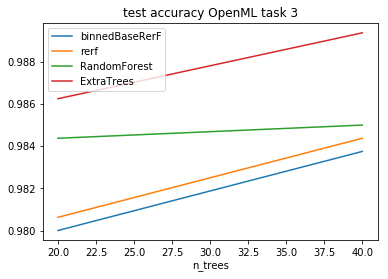

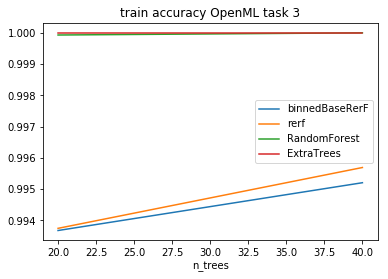

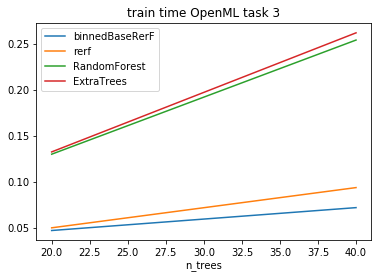

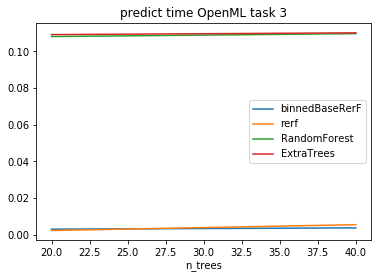

In [5]:
task_id=3

bms3 = np.zeros(shape=(len(n_trees), len(all_forests), 4, n_iterations))

for i, n in enumerate(tqdm(n_trees)):
    # should have a dict of rerf kwargs and a dict of sklearn kwargs
    # i.e. the function benchmark should take a 1) task id, 2) whether or not
    # to preprocess the data, 3) the types of forests, 4) rerf/sklearn kwargs
    # 5) number of iterations
    temp_rerf = []
    
    for j, dic in enumerate(rerf_kwargs):
        temp_rerf.append(dic.copy())
        temp_rerf[j]['trees'] = n
    
    temp_sklearn = []
    
    for j, dic in enumerate(sklearn_kwargs):
        temp_sklearn.append(dic.copy())
        temp_sklearn[j]['n_estimators'] = n
    
    bm = benchmark(oml_task_id=task_id, 
                   preprocess=False, 
                   rerfs = rerfs,
                   rerfs_kwargs=temp_rerf,
                   sklearns = sklearns,
                   sklearns_kwargs=temp_sklearn,
                   n_iterations=n_iterations
         )
    bms3[i] = bm
    
benchmark_plot(bms3, all_forests, task_id=3, param='n_trees', param_values=n_trees)
# averages3 = np.mean(bms3, axis=3)
# data3 = [[[] for _ in range(4)] for __ in range(len(all_forests))]

# for i in range(len(n_trees)):
#     for j in range(len(data3)):
#         for k in range(len(data3[j])):
#             data3[j][k].append(averages3[i][j][k])

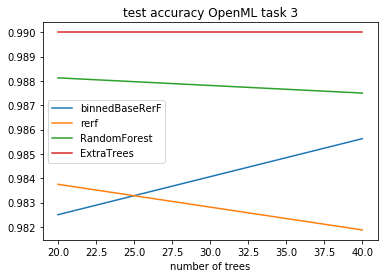

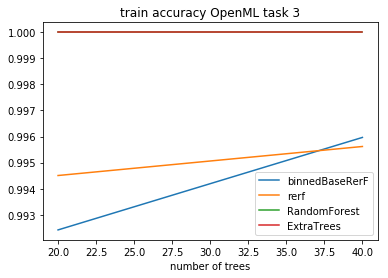

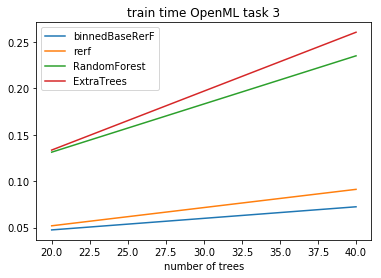

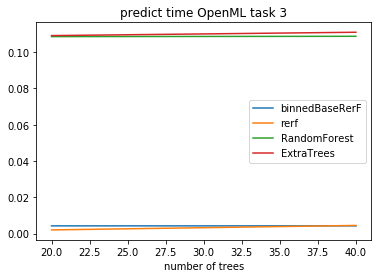

In [9]:
fig, ax0 = plt.subplots(1,1)
fig, ax1 = plt.subplots(1,1)
fig, ax2 = plt.subplots(1,1)
fig, ax3 = plt.subplots(1,1)
axes = [ax0, ax1, ax2, ax3]
titles = ['test accuracy', 'train accuracy', 'train time', 'predict time']


for i, forest in enumerate(all_forests):
    for j in range(len(axes)):
        axes[j].plot(n_trees, data3[i][j], label=forest)
        
for i, title in enumerate(titles):
    axes[i].legend()
    axes[i].set_title(title + ' OpenML task %s'%(task_id))
    axes[i].set_xlabel('number of trees')

In [6]:
task_id=6
bms6 = np.zeros(shape=(len(n_trees), len(all_forests), 4, n_iterations))

for i, n in enumerate(tqdm(n_trees)):
    # should have a dict of rerf kwargs and a dict of sklearn kwargs
    # i.e. the function benchmark should take a 1) task id, 2) whether or not
    # to preprocess the data, 3) the types of forests, 4) rerf/sklearn kwargs
    # 5) number of iterations
    bm = benchmark(oml_task_id=task_id, 
                   preprocess=False, 
                   rerfs = rerfs,
                   sklearns = sklearns,
                   num_trees=n,
                   num_cores=8,
                   n_iterations=n_iterations
         )
    bms6[i] = bm
averages6 = np.mean(bms6, axis=3)
data6 = [[[] for _ in range(4)] for __ in range(len(all_forests))]

for i in range(len(n_trees)):
    for j in range(len(data6)):
        for k in range(len(data6[j])):
            data6[j][k].append(averages6[i][j][k])

KeyboardInterrupt: 

In [16]:
def benchmark_plot(results, # Assumed to be an M x F x 4 x n_iterations array,
                   all_forests = ['binnedRerF, RandomForest'],
                   titles=['test accuracy', 'train accuracy', 'train time', 'predict time'],
                   param='n_trees',
                   task_id=-1
    ):

    M, F, K, n_iterations = results.shape
    averages = np.mean(results, axis=3)
    data = [[[] for _ in range(4)] for __ in range(F)]

    for i in range(len(n_trees)):
        for j in range(len(data)):
            for k in range(len(data[j])):
                data[j][k].append(averages[i][j][k])
                
    K = len(titles)
    axes = [plt.subplots(1,1) for _ in range(K)]
    
    for i, forest in enumerate(all_forests):
        for j in range(len(axes)):
            axes[j][1].plot(n_trees, data3[i][j], label=forest)
        
    for i, title in enumerate(titles):
        axes[i][1].legend()
        if task_id == -1:
            axes[i][1].set_title(title)#+ ' OpenML task %s'%(task_id))
        else:
            axes[i][1].set_title(title + ' OpenML task %s'%(task_id))
        axes[i][1].set_xlabel(param)
        
    return

In [8]:
def fit_sklearn(X,
                y,
                train_test_splits, 
                forest_type='RandomForest',
                forest_kwargs=None,
                acorn = None
    ):
    # I assume the data has been preprocessed
    if num_trees is None:
        num_trees = 10
    if acorn is None:
        acorn = np.random.randint(100000)
    np.random.seed(acorn)
    
    train_idx = train_test_splits[0]
    test_idx = train_test_splits[1]
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    if forest_type == 'RandomForest':
        model = RandomForestClassifier(**forest_kwargs)
    elif forest_type == 'ExtraTrees':
        model = ExtraTreesClassifier(**forest_kwargs)
    else:
        raise ValueError('model %s not implemented'%(forestType))
        
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end_train = time.time()
    
    y_test_hat = model.predict(X_test)
    
    end_predict = time.time()
    test_accuracy = np.sum(y_test_hat == y_test)/len(y_test)
    
    y_train_hat = model.predict(X_train)
    train_accuracy = np.sum(y_train_hat == y_train)/len(y_train)
    
    train_time = end_train - start
    predict_time = end_predict - end_train
    
    return test_accuracy, train_accuracy, train_time, predict_time

In [3]:
def fit_RerF(X,
             y,
             train_test_splits, 
             forest_type = 'binnedBaseRerF', 
             num_trees = None,
             num_cores = 8, 
             acorn = None
    ):
    # I assume data has been preprocessed
    if num_trees is None:
        num_trees = 10
    if acorn is None:
        acorn = np.random.randint(100000)
    np.random.seed(acorn)
    
    train_idx = train_test_splits[0]
    test_idx = train_test_splits[1]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    start = time.time()
    rerf = fastRerF(X_train, y_train, forestType=forest_type, trees=num_trees, numCores=num_cores, seed = acorn)
    end_train = time.time()
    
    y_test_hat = fastPredict(X_test, rerf)
    end_predict = time.time()
    test_accuracy = np.sum(y_test_hat == y_test)/len(y_test)
    
    y_train_hat = fastPredict(X_train, rerf)
    train_accuracy = np.sum(y_train_hat == y_train)/len(y_train)
    
    train_time = end_train - start
    predict_time = end_predict - end_train
    return test_accuracy, train_accuracy, train_time, predict_time

In [5]:
def benchmark(oml_task_id=3, 
              n_iterations = 10,
              preprocess=False,
              train_test_splits = None,
              rerfs=['binnedBaseRerF'], 
              sklearns=['RandomForest'], 
              num_trees = None, 
              num_cores = 8,
              acorn=None
    ):
    if acorn is None:
        acorn = np.random.randint(100000)
    if num_trees is None:
        num_trees = 10
    np.random.seed(acorn)
    
    task = openml.tasks.get_task(oml_task_id)
    X, y = task.get_X_and_y()
    
    if preprocess:
        # TODO
        pass
    
    if train_test_splits is None:
        train_test_splits = task.get_train_test_split_indices()
    else:
        # TODO
        pass
        
    rerf_results = np.zeros(shape=(len(rerfs), 4, n_iterations))
    
    for i, model in enumerate(rerfs):
        for j in range(n_iterations):
            rerf_results[i,:,j]=fit_RerF(X, y, train_test_splits, forest_type=model, num_trees=num_trees, num_cores=num_cores)
        
    sklearn_results = np.zeros(shape=(len(rerfs), 4, n_iterations))
    for i, model in enumerate(sklearns):
        for j in range(n_iterations):
            sklearn_results[i,:,j]=fit_sklearn(X, y, train_test_splits, forest_type=model, num_trees=num_trees, num_cores=num_cores)
    
    return rerf_results, sklearn_results